In [5]:
import tensorflow as tf
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Conv2D , Dense , MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [14]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [17]:
print(x_train.shape)

(60000, 28, 28)


In [18]:
x_train[0].min(), x_train[0].max()

(np.uint8(0), np.uint8(255))

In [20]:
x_train = (x_train - 0.0 )/ (255 -0.0)
x_test = (x_test - 0.0 ) /(255 - 0.0)
x_train[0].min() , x_train[0].max()

(np.float64(0.0), np.float64(0.00392156862745098))

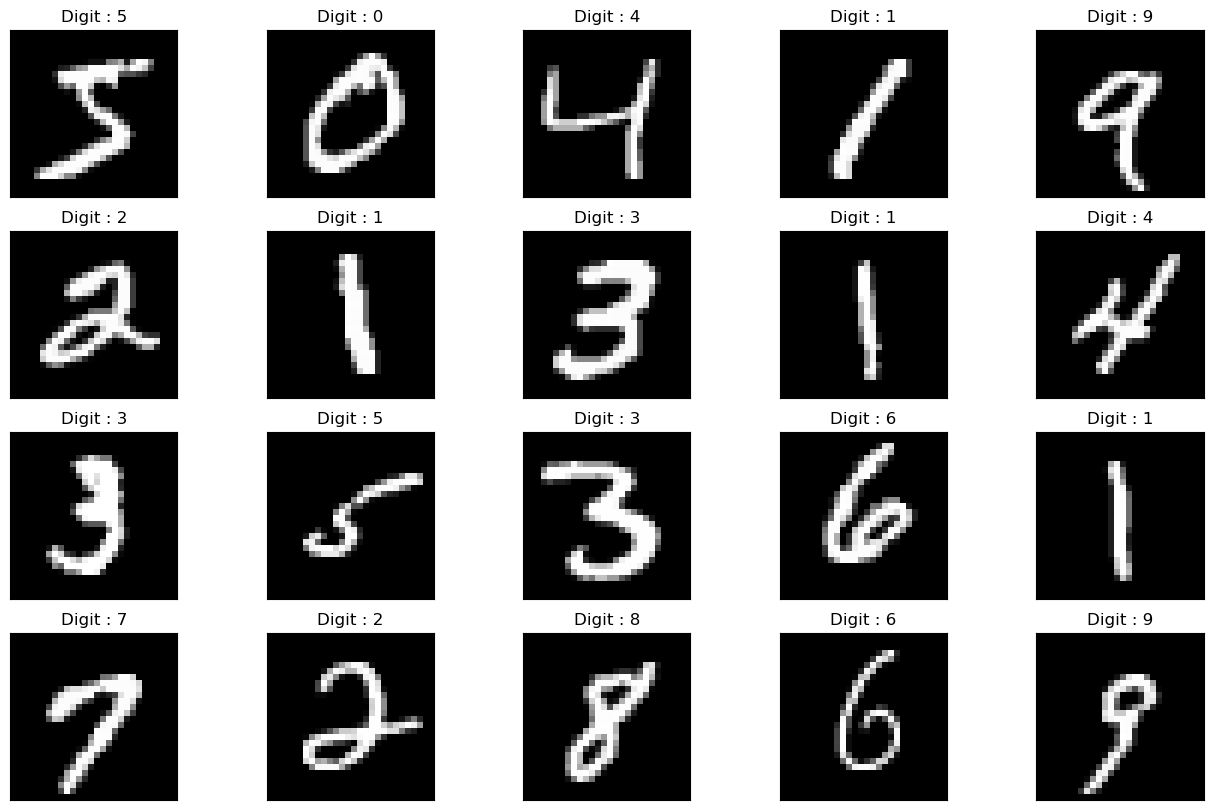

In [22]:
def plot_digit(image , digit , plt , i):
    plt.subplot(4 ,5 , i+1)
    plt.imshow(image , cmap = plt.get_cmap('gray'))
    plt.title(f"Digit : {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize = (16 , 10))
for i in range(20):
    plot_digit(x_train[i] , y_train[i] , plt , i)
plt.show()    
    

In [23]:
x_train = x_train.reshape((x_train.shape +(1,)))
x_test = x_test.reshape(x_test.shape +(1,))

In [24]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [30]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
optimizer =SGD(learning_rate =0.01 ,momentum =0.9)
model.compile(
    optimizer = optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(x_train , y_train , epochs=10 , batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.1109 - loss: 2.3021 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1112 - loss: 2.3019 
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1115 - loss: 2.3020
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.1104 - loss: 2.3019
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.1117 - loss: 2.3019
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.1106 - loss: 2.3020
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.1104 - loss: 2.3020
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.1115 - loss: 2.3020
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.1111 - loss: 2.3019
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.1114 - loss: 2.3019


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


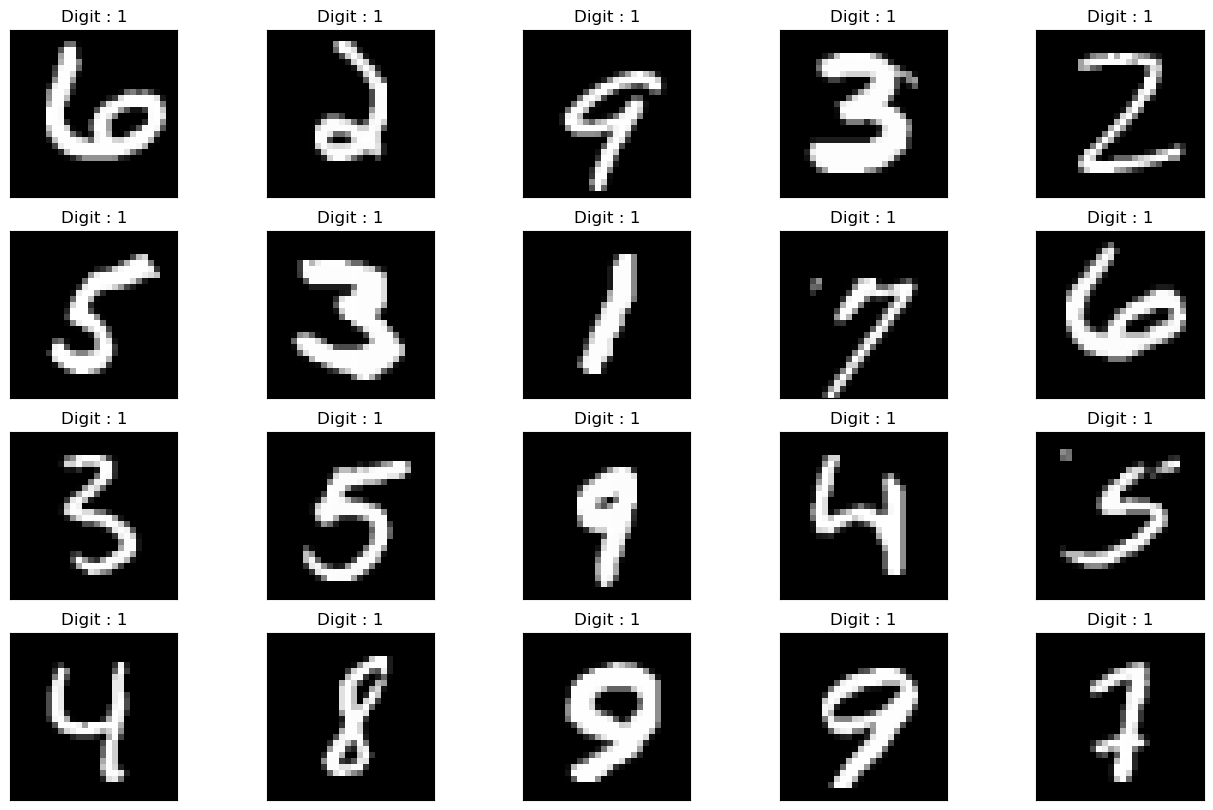

In [36]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1,28,28,1)))[0],axis=-1)
    plot_digit(image,digit,plt,i)
plt.show()

In [39]:
predictions =np.argmax(model.predict(x_test), axis =-1)
accuracy_score(y_test,predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.1135

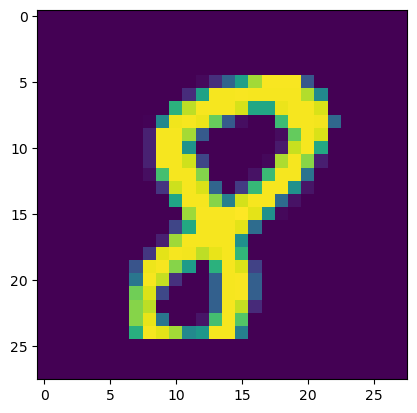

In [40]:
n = random.randint(0 , 9999)
plt.imshow(x_test[n])
plt.show()

In [41]:
predicted_value = model.predict(x_test)
print("Hnadwritten digit is %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Hnadwritten digit is 1


In [42]:
score = model.evaluate(x_test , y_test , verbose = 0)
print('Test Loss : ' , score[0])
print('Test accuracy : ',score[1])

Test Loss :  2.3013648986816406
Test accuracy :  0.11349999904632568
